In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("ds.csv")

In [5]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,3.70,Card,24.0,27.950000
1,1,2.77,Card,18.4,19.200000
2,1,3.30,Card,22.6,27.383333
3,1,0.30,Cash,5.1,2.550000
4,1,0.83,Card,7.2,5.250000


In [7]:
data.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [9]:
data.duplicated().sum()

5557871

In [10]:
data.shape

(8451090, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451090 entries, 0 to 8451089
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   payment_type     object 
 3   fare_amount      float64
 4   duration         float64
dtypes: float64(3), int64(1), object(1)
memory usage: 322.4+ MB


In [15]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,8.451090e+06,8.451090e+06,8.451090e+06,8.451090e+06
mean,1.339824e+00,1.751135e+00,1.273180e+01,1.173603e+01
std,7.658024e-01,1.045488e+00,5.346809e+00,6.218064e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.700000e-01,8.600000e+00,6.900000e+00
50%,1.000000e+00,1.500000e+00,1.210000e+01,1.065000e+01
75%,1.000000e+00,2.300000e+00,1.630000e+01,1.561667e+01
max,5.000000e+00,5.230000e+00,4.080000e+01,2.995000e+01


In [16]:
data.count

<bound method DataFrame.count of          passenger_count  trip_distance payment_type  fare_amount   duration
0                      1           3.70         Card         24.0  27.950000
1                      1           2.77         Card         18.4  19.200000
2                      1           3.30         Card         22.6  27.383333
3                      1           0.30         Cash          5.1   2.550000
4                      1           0.83         Card          7.2   5.250000
...                  ...            ...          ...          ...        ...
8451085                1           1.00         Card         15.6  17.333333
8451086                2           2.84         Card         25.4  29.550000
8451087                1           0.74         Cash          6.5   4.900000
8451088                1           0.73         Card          5.8   2.683333
8451089                1           2.15         Cash         12.8  10.966667

[8451090 rows x 5 columns]>

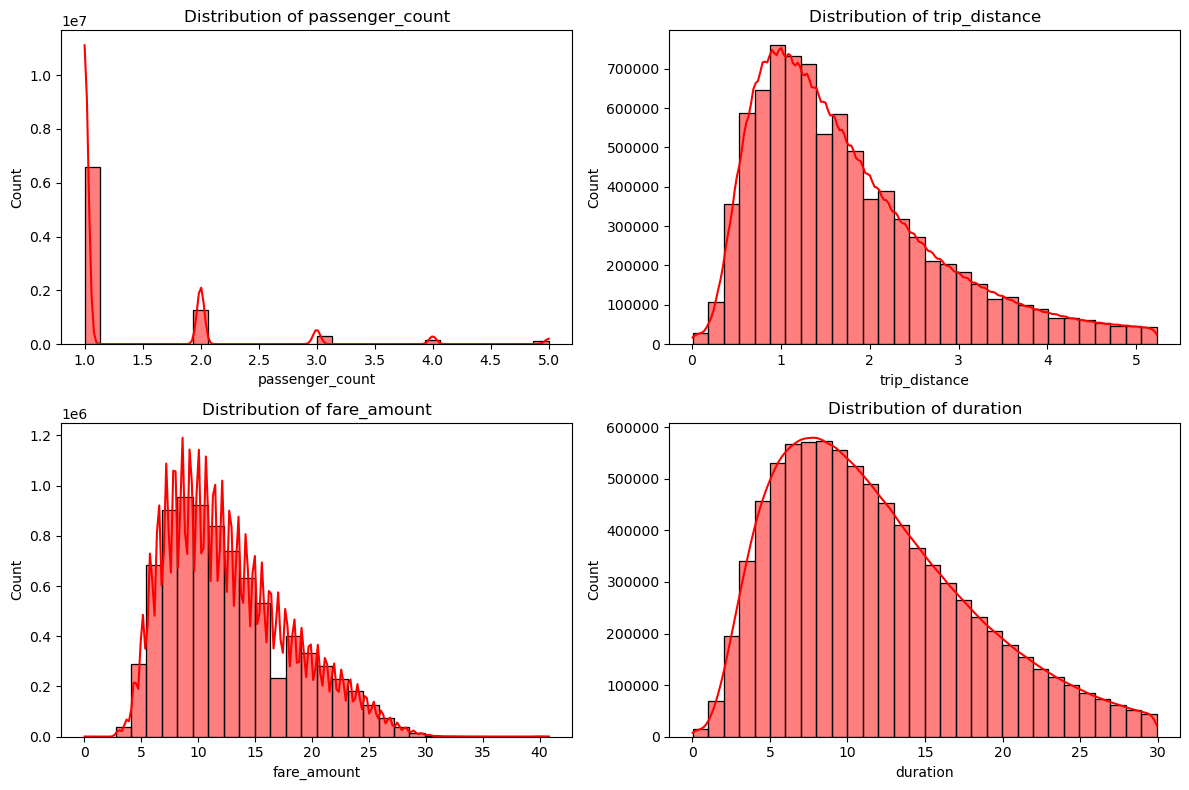

In [17]:
numerical_cols = ["passenger_count", "trip_distance", "fare_amount", "duration"]
plt.figure(figsize= (12,8))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(data[col], kde = True , bins = 30, color= 'red')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

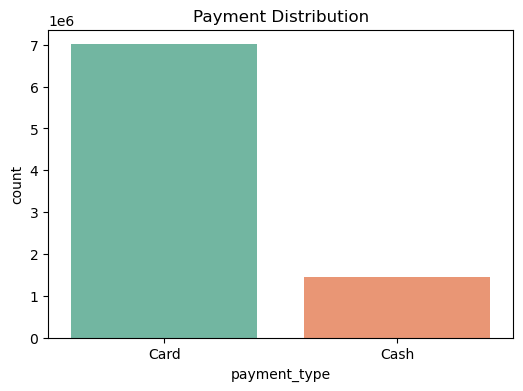

In [25]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'payment_type' , data = data, palette = 'Set2')
plt.title("Payment Distribution")
plt.show()

In [27]:
label_enc = LabelEncoder()

data['payment type'] = label_enc.fit_transform(data['payment_type'])
scalar = StandardScaler()
numerical_cols = ["passenger_count", "trip_distance", "fare_amount", "duration"]

df_transform = scalar.fit_transform(data[numerical_cols])

                                             

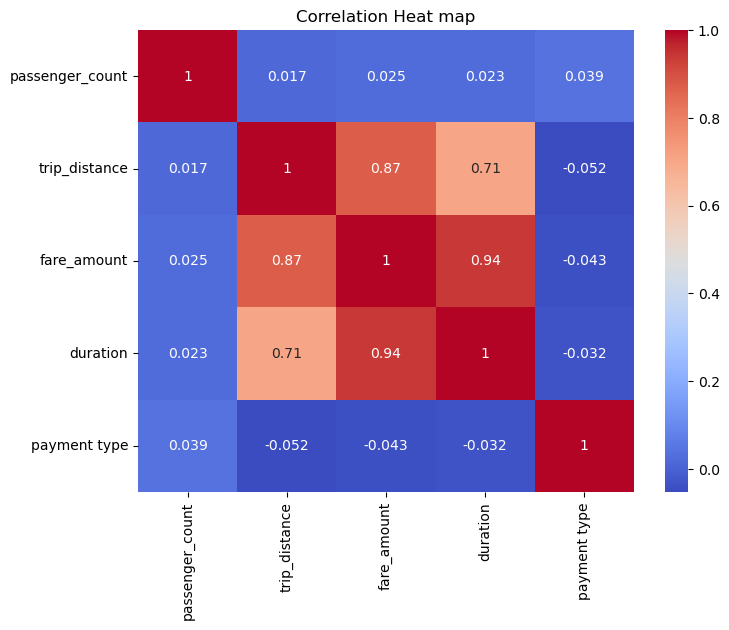

In [29]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize = (8,6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heat map")
plt.show()

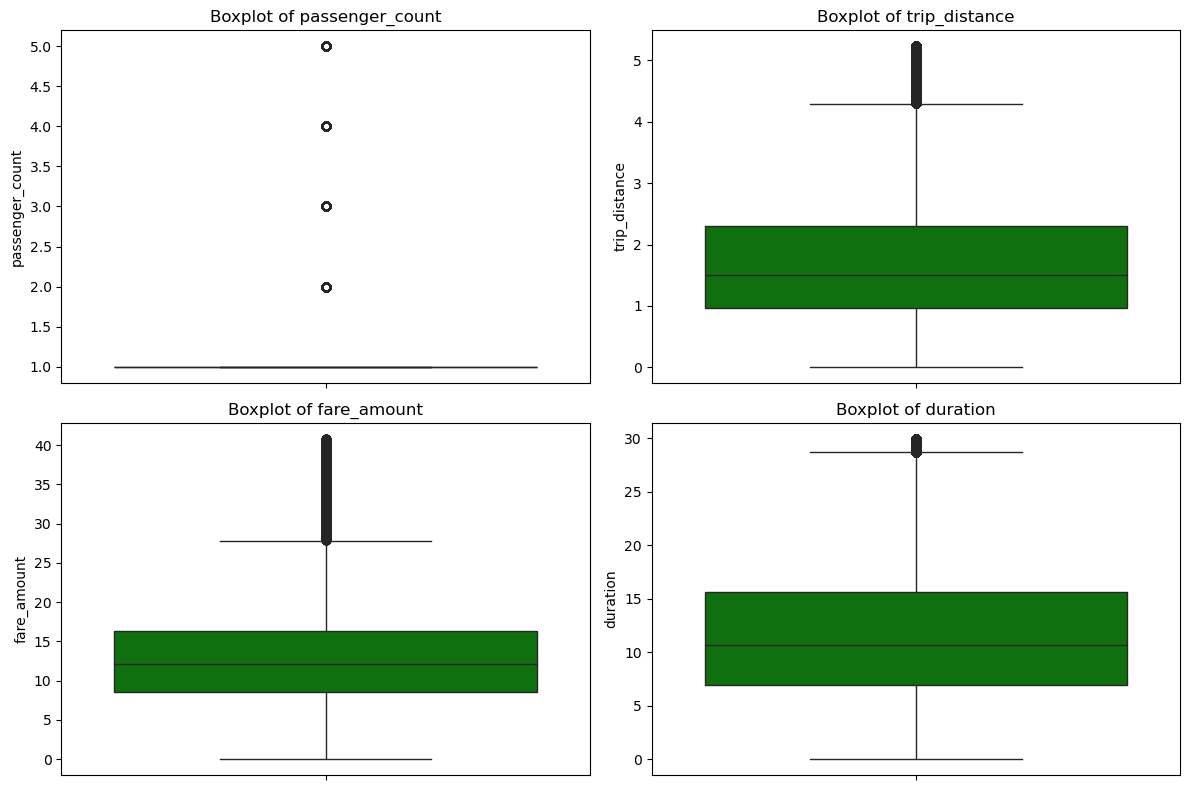

In [31]:
plt.figure(figsize = (12,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col], color = "green")
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
    


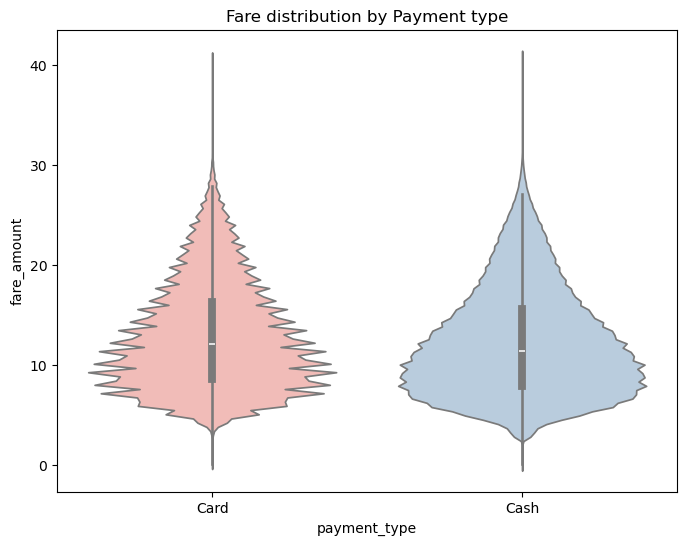

In [37]:
plt.figure(figsize = (8,6))
sns.violinplot(x= 'payment_type', y= 'fare_amount' , data = data, palette = 'Pastel1')
plt.title('Fare distribution by Payment type')
plt.show()

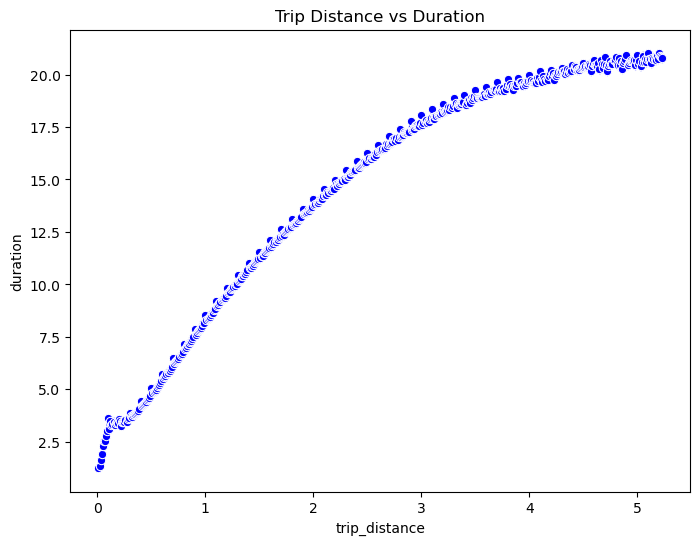

In [39]:
plt.figure(figsize = (8, 6))
sns.lineplot(x= 'trip_distance', y = 'duration', data= data, marker = 'o', color = 'blue',)
plt.title('Trip Distance vs Duration')
plt.show()

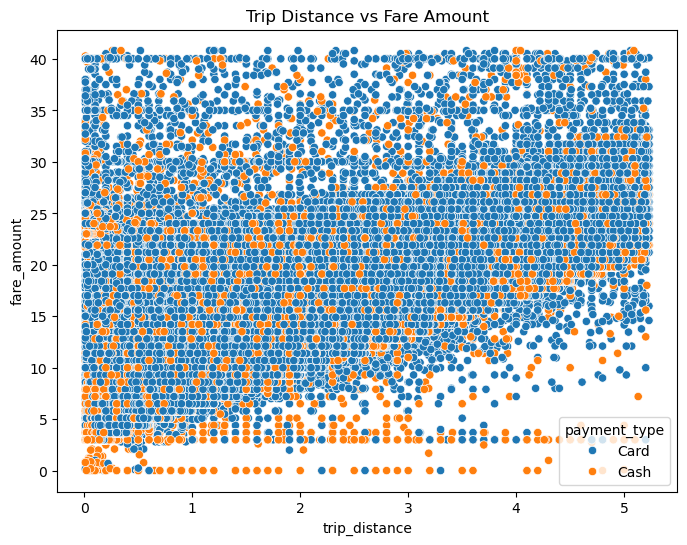

In [41]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'trip_distance', y = 'fare_amount', hue = 'payment_type' , data= data)
plt.title('Trip Distance vs Fare Amount')
plt.show()

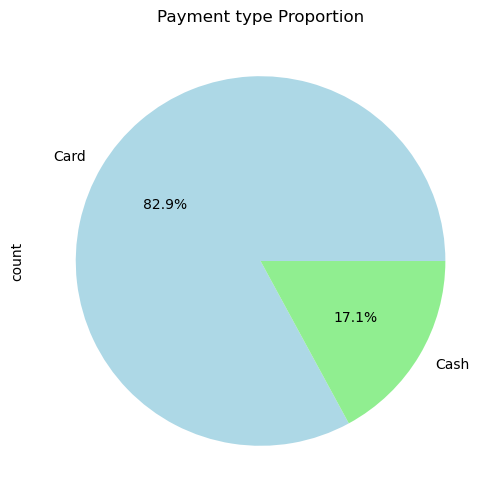

In [47]:
plt.figure(figsize =(6,6))
data['payment_type'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightblue','lightgreen'])
plt.title('Payment type Proportion')
plt.show()

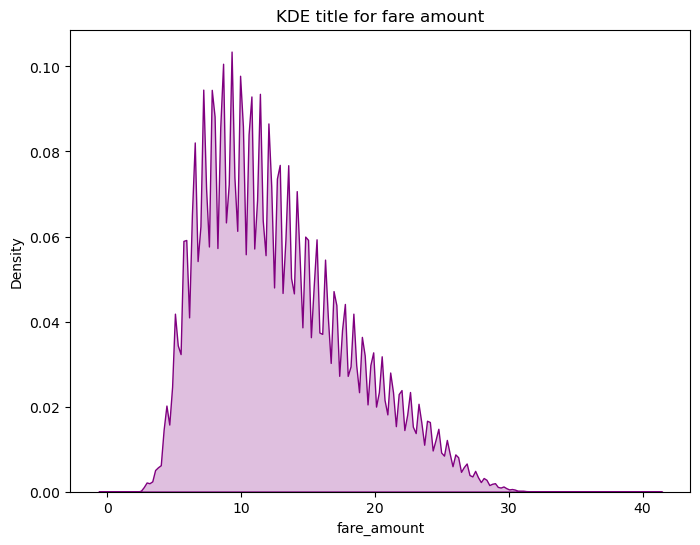

In [49]:
plt.figure(figsize =(8,6))
sns.kdeplot(data['fare_amount'], shade = True , color = 'purple')
plt.title('KDE title for fare amount')
plt.show()

In [57]:
X = data.drop('fare_amount', axis = 1)
y = data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42) 

In [69]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso()

}

In [ ]:
if data.columns[-1].startswith('Unnamed') or data.iloc[:, -1].apply(lambda x: str(x).strip() == "3333333333333333" or pd.isna(x)).all():
    data = data.iloc[:, :-1]

# Step 2: Select relevant features and target
# Using 'fare_amount' as the target variable for this example
X = data[['passenger_count', 'trip_distance', 'payment_type', 'duration']]
y = data['fare_amount']

# Step 3: Clean numerical columns
# Ensure 'passenger', 'trip_distance', and 'duration' are numeric
numerical_cols = ['passenger_count', 'trip_distance', 'duration']
for col in numerical_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop rows with NaN in numerical columns (if any)
X = X.dropna(subset=numerical_cols)
y = y[X.index]  # Align y with the filtered X

# Step 4: Encode categorical variables
# One-hot encode 'payment_type' ("Card" or "Cash")
X = pd.get_dummies(X, columns=['payment_type'], drop_first=True)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Regressor': SVR(kernel='rbf')
}

# Step 7: Fit models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}
    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

Linear Regression - MSE: 0.7458, R2 Score: 0.9739
Ridge Regression - MSE: 0.7458, R2 Score: 0.9739
Lasso Regression - MSE: 0.7599, R2 Score: 0.9734
Decision Tree - MSE: 0.8355, R2 Score: 0.9707
